# Shot Type for Ads

## Exploratory Data Analysis


In [161]:
import os

import cv2
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import json



### Load dataset

In [145]:
# reading the JSON data using json.load()
file = '../dataset/v1_split_trailer.json'
with open(file) as train_file:
    dict= json.load(train_file)


In [146]:
dataset = []
movie = []
shot= []
scale_label = []
scale_val = []
mov_label = []
mov_val = []

for key_type_ds in dict:
    for key_movie in dict[key_type_ds]:
        for key_shot in dict[key_type_ds][key_movie]:

            dataset.append(key_type_ds)
            movie.append(key_movie)
            shot.append(key_shot)
            scale_label.append(dict[key_type_ds][key_movie][key_shot]['scale']['label'])
            scale_val.append(dict[key_type_ds][key_movie][key_shot]['scale']['value'])
            mov_label.append(dict[key_type_ds][key_movie][key_shot]['movement']['label'])
            mov_val.append(dict[key_type_ds][key_movie][key_shot]['movement']['value'])
            
data = list(zip(dataset, movie, shot, scale_label, scale_val, mov_label, mov_val))  
columns = ['dataset','movie', 'shot', 'scale_label', 'scale_val', 'move_label', 'move_val']  
        
df = pd.DataFrame(data, columns=columns)

In [147]:
df

,dataset,movie,shot,scale_label,scale_val,move_label,move_val
0,train,tt0444850,0014,CS,1,Static,4
1,train,tt0444850,0015,CS,1,Static,4
2,train,tt0444850,0016,ECS,0,Static,4
3,train,tt2005173,0002,MS,2,Static,4
4,train,tt2005173,0014,CS,1,Static,4
...,...,...,...,...,...,...,...
33648,test,tt6644200,0011,FS,3,Static,4
33649,test,tt6644200,0015,MS,2,Motion,0
33650,test,tt6644200,0021,FS,3,Motion,0
33651,test,tt6644200,0026,LS,4,Static,4


#### Number of movies

In [157]:
movies_num = df['movie'].unique().shape[0]
movies_num

7848

#### Number of shots

In [158]:
shots_num = df['shot'].shape[0]
shots_num

33653

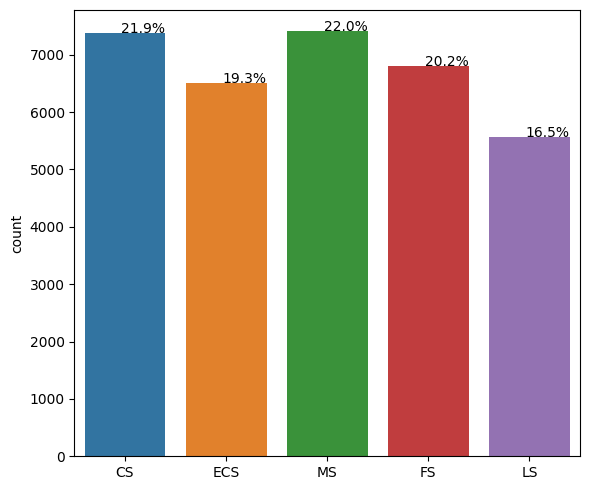

In [180]:
# Plotting the Education level with percentages
fig, axes = plt.subplots(figsize=(6,5))
ax=sns.countplot(x= df['scale_label'].values)

#calculating percentage of each label
total = float(len(df['scale_label']))
for p in axes.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')


fig.tight_layout()
plt.show()

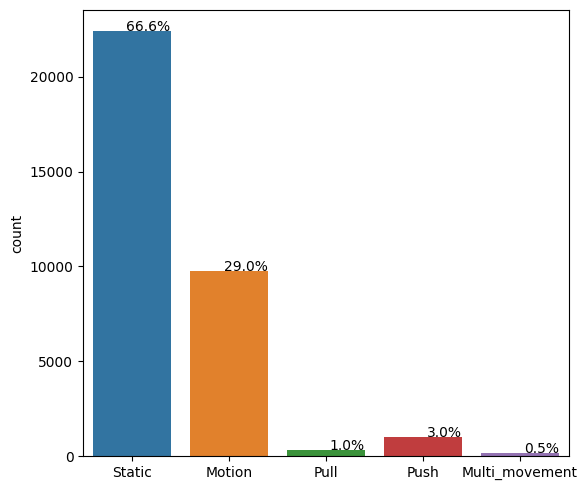

In [181]:
# Plotting the Education level with percentages
fig, axes = plt.subplots(figsize=(6,5))
ax=sns.countplot(x= df['move_label'].values)

#calculating percentage of each label
total = float(len(df['move_label']))
for p in axes.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')


fig.tight_layout()
plt.show()

#### Number of FPS, Frames and duration 

In [182]:
import cv2

In [ ]:
video = cv2.VideoCapture('shot_0016.mp4')
total_frames = video.get(cv2.CAP_PROP_FRAME_COUNT)
print(total_frames)
fps = video.get(cv2.CAP_PROP_FPS)
print(fps)